In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from shapely.geometry import Point
#import geopandas as gpd
#from geopandas import GeoDataFrame

In [2]:
df = pd.read_csv("real_estate.csv")

In [3]:
df.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Do we have missing values in this dataset?

In [5]:
df.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

In [9]:
# No we don not have any null values.

# Looking at the `house_age	`, what is the oldest house in the dataset?

In [14]:
print("{} years old house is the oldest house in the dataset.".format(df["house_age"].max()))

43.8 years old house is the oldest house in the dataset.


# What is the average age of houses in the dataset? 
#### **hint** would you use mean or median, give reason for your answer

In [30]:
df["house_age"].median()

16.1

In [31]:
# the reason i'm using median instead of mean is because the column name "house_age" is skewed distribution or
# asymmetric distribution.
# we can see skewed continuous from histogram plotted below.

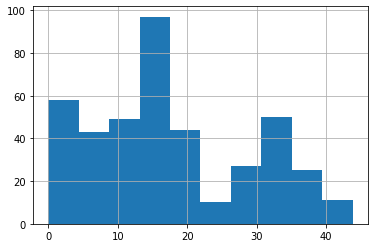

In [32]:
df["house_age"].hist();

# How many `local_convenience_stores` are in the location where we have the oldest house?

In [43]:
print(df.loc[df["house_age"]==df["house_age"].max(), "local_convenience_stores"])

192    7
Name: local_convenience_stores, dtype: int64


In [44]:
# there are 7 number of stores in the location where we have the oldest house.

# What is the `price_per_unit` of the oldest house?

In [45]:
df.loc[df["house_age"]==df["house_age"].max(), "price_per_unit"]

192    42.7
Name: price_per_unit, dtype: float64

In [46]:
# price per unit of the oldest house is 42.7

# What is the `price_per_unit` of the newest house?

In [110]:
count=0
for i in df["house_age"]:
    if i==0:
        count+=1
        print("newest")
print("There are {} number of new houses that is built in this year". format(count))
print("Newest priceper unit is {}". format(df["price_per_unit"].min()))

newest
newest
newest
newest
newest
newest
newest
newest
newest
newest
newest
newest
newest
newest
newest
newest
newest
There are 17 number of new houses that is built in this year
Newest priceper unit is 7.6


# Looking at the `price_per_unit`, what is the :
* Mean
* Median
* Highest price per unit
* Lowest price per unit

In [68]:
l=[1,2,3,4]
for i in l:
    if i==1:
        print("Mean of the price_per_unit column is {}".format(round(df["price_per_unit"].mean(), 2)))
    elif i==2:
        print("Median of the price_per_unit column is {}".format(round(df["price_per_unit"].median(), 2)))
    elif i==3:
        print("Highest price pe unit is {}".format(round(df["price_per_unit"].max(), 2)))
    else:
        print("Lowest price pe unit is {}".format(round(df["price_per_unit"].min(), 2)))

Mean of the price_per_unit column is 37.98
Median of the price_per_unit column is 38.45
Highest price pe unit is 117.5
Lowest price pe unit is 7.6


# Replicate the plot below

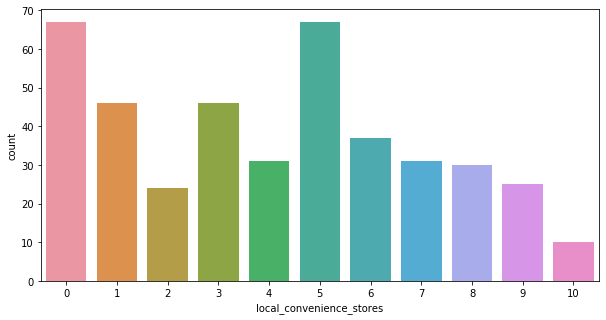

In [87]:
# Code here
plt.figure(figsize=(10, 5))
sns.countplot(x=df["local_convenience_stores"]);

# Plotting the Lat & Log

In [ ]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)  

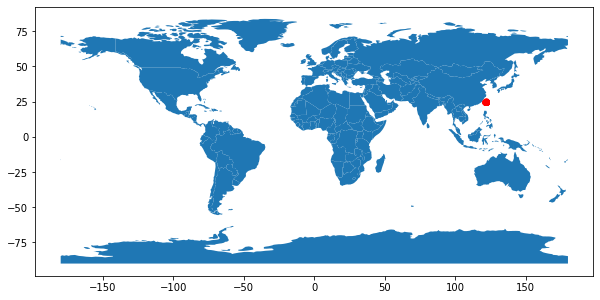

In [23]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=30);